<center><img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" /></center>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Aprendizaje Automático </h1>

<H3 align='center'> Tarea/Taller 1 </H3>
<hr style="height:2px;border:none"/>

**Integrantes**


*   Domingo Benoit
*   Tomás Berríos



**Temas**  

* Clasificadores Discriminativos Clásicos
* Clasificadores Generativos Clásicos
* Regresión Lineal y Regularización 
* Selección de Características (parcial, seguiremos en T2)
* Reducción de Dimensionalidad


<hr style="height:2px;border:none"/>


#Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

import random

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.utils import resample

%matplotlib notebook

plt.style.use('seaborn-colorblind')

#Dataset

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :]
Y = iris.target
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=112)
df = pd.DataFrame(data= np.c_[x_train, y_train], columns=['sepallength', 'sepalwidth', 'petallength', 'petalwidth', "class"])
df['class'] = pd.to_numeric(df['class'], downcast='integer')

n_class = np.min(df.groupby('class')['class'].count())
p_imb = 0.0
n_iter = 6
df_class_0 = []
df_class_1 = []
df_class_2 = []

for _ in range(0, n_iter):
  n_reduce = int(n_class * p_imb)
  class_0_i = resample(df[df['class'] == 0], replace=False, n_samples=n_class - n_reduce, random_state=123)
  class_1_i = resample(df[df['class'] == 1], replace=False, n_samples=n_class - n_reduce, random_state=123)
  class_2_i = resample(df[df['class'] == 2], replace=False, n_samples=n_class - n_reduce, random_state=123)
  cant_total = n_class + 2*(n_class - n_reduce)
  
  df_class_0.append(pd.concat([df[df['class'] == 0], class_1_i, class_2_i]))
  
  df_class_1.append(pd.concat([class_0_i, df[df['class'] == 1], class_2_i]))
  
  df_class_2.append(pd.concat([class_0_i, class_1_i, df[df['class'] == 2]]))
  p_imb += 0.1


In [3]:
y_test.shape

(75,)

#Training

In [4]:
cv_class_0_score_LR = []
cv_class_1_score_LR = []
cv_class_2_score_LR = []
cv_class_0_score_NB = []
cv_class_1_score_NB = []
cv_class_2_score_NB = []

acc_class_0_score_LR = []
acc_class_1_score_LR = []
acc_class_2_score_LR = []

acc_class_0_score_NB = []
acc_class_1_score_NB = []
acc_class_2_score_NB = []

for i in range(0, n_iter):
  lr = LogisticRegression(max_iter=1000)
  nb = GaussianNB()
  x_train = df_class_0[i][['sepallength', 'sepalwidth', 'petallength', 'petalwidth']]
  y_train = df_class_0[i]['class']
  cv_scores = cross_val_score(lr, x_train, y_train, cv = 5)
  cv_class_0_score_LR.append(np.mean(cv_scores))
  cv_scores = cross_val_score(nb, x_train, y_train, cv = 5)
  cv_class_0_score_NB.append(np.mean(cv_scores))

  lr.fit(x_train, y_train)
  y_pred = lr.predict(x_test)
  acc_class_0_score_LR.append(accuracy_score(y_test, y_pred))

  nb.fit(x_train, y_train)
  y_pred = nb.predict(x_test)
  acc_class_0_score_NB.append(accuracy_score(y_test, y_pred))

  lr = LogisticRegression(max_iter=1000)
  nb = GaussianNB()
  x_train = df_class_1[i][['sepallength', 'sepalwidth', 'petallength', 'petalwidth']]
  y_train = df_class_1[i]['class']
  cv_scores = cross_val_score(lr, x_train, y_train, cv = 5)
  cv_class_1_score_LR.append(np.mean(cv_scores))
  cv_scores = cross_val_score(nb, x_train, y_train, cv = 5)
  cv_class_1_score_NB.append(np.mean(cv_scores))

  lr.fit(x_train, y_train)
  y_pred = lr.predict(x_test)
  acc_class_1_score_LR.append(accuracy_score(y_test, y_pred))

  nb.fit(x_train, y_train)
  y_pred = nb.predict(x_test)
  acc_class_1_score_NB.append(accuracy_score(y_test, y_pred))

  lr = LogisticRegression(max_iter=1000)
  nb = GaussianNB()
  x_train = df_class_2[i][['sepallength', 'sepalwidth', 'petallength', 'petalwidth']]
  y_train = df_class_2[i]['class']
  cv_scores = cross_val_score(lr, x_train, y_train, cv = 5)
  cv_class_2_score_LR.append(np.mean(cv_scores))
  cv_scores = cross_val_score(nb, x_train, y_train, cv = 5)
  cv_class_2_score_NB.append(np.mean(cv_scores))

  lr.fit(x_train, y_train)
  y_pred = lr.predict(x_test)
  acc_class_2_score_LR.append(accuracy_score(y_test, y_pred))

  nb.fit(x_train, y_train)
  y_pred = nb.predict(x_test)
  acc_class_2_score_NB.append(accuracy_score(y_test, y_pred))


In [5]:
mean_CV_LR = (np.array(cv_class_0_score_LR) + np.array(cv_class_1_score_LR) + np.array(cv_class_2_score_LR))/3
mean_CV_NB = (np.array(cv_class_0_score_NB) + np.array(cv_class_1_score_NB) + np.array(cv_class_2_score_NB))/3

mean_acc_LR = (np.array(acc_class_0_score_LR) + np.array(acc_class_1_score_LR) + np.array(acc_class_2_score_LR))/3
mean_acc_NB = (np.array(acc_class_0_score_NB) + np.array(acc_class_1_score_NB) + np.array(acc_class_2_score_NB))/3

#Plotting

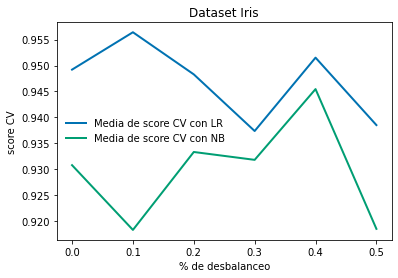

In [6]:
plt.figure()
steps = [float(i*0.1) for i in range(0, n_iter)]
plt.plot(steps, mean_CV_LR,linewidth=2)
plt.plot(steps, mean_CV_NB,linewidth=2)


plt.xlabel('% de desbalanceo', fontsize=10)
plt.ylabel('score CV', fontsize=10)
plt.title('Dataset Iris', fontsize=12)
plt.legend(['Media de score CV con LR','Media de score CV con NB'],loc=0,frameon=False)

 
plt.show()

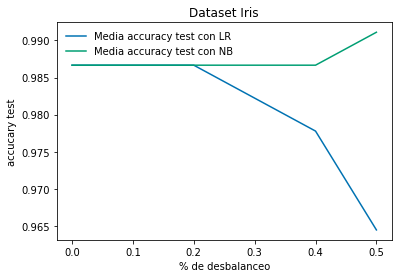

In [7]:
plt.figure()
steps = [float(i*0.1) for i in range(0, n_iter)]
plt.plot(steps, mean_acc_LR)
plt.plot(steps, mean_acc_NB)

plt.xlabel('% de desbalanceo', fontsize=10)
plt.ylabel('accucary test', fontsize=10)
plt.title('Dataset Iris', fontsize=12)
plt.legend(['Media accuracy test con LR','Media accuracy test con NB'],loc=0,frameon=False)

plt.show()